In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd


pca_df= pd.read_csv('pca_dataframe.csv', low_memory=False)
operational_df = pd.read_csv('ddos_dataset.csv', low_memory=False)

operational_df['label'] = pd.Categorical(operational_df['label']).codes

X_train, X_test, y_train, y_test = train_test_split(
    pca_df[pca_df.columns],
    operational_df['label'],
    stratify=operational_df['label'],
    train_size=0.7,
    random_state=15
)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

model_SVC = SVC()
model_SVC.fit(X_train, y_train)

model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

y_pred_train_KNN = model_KNN.predict(X_train)
y_pred_test_KNN = model_KNN.predict(X_test)

y_pred_train_RFC = model_RFC.predict(X_train)
y_pred_test_RFC = model_RFC.predict(X_test)

y_pred_train_SVC = model_SVC.predict(X_train)
y_pred_test_SVC = model_SVC.predict(X_test)

y_pred_train_GNB = model_GNB.predict(X_train)
y_pred_test_GNB = model_GNB.predict(X_test)

model: KNN
train set predictions evaluation
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3961
           1       0.98      0.96      0.97      3758
           2       0.97      0.97      0.97      4149
           3       0.98      0.98      0.98      4138
           4       0.99      0.99      0.99      4081
           5       0.95      0.97      0.96       690
           6       1.00      1.00      1.00      4189
           7       0.99      1.00      1.00      4179
           8       0.99      0.99      0.99      3836
           9       0.99      0.99      0.99      3683
          10       1.00      1.00      1.00      4113
          11       1.00      1.00      1.00      4190

    accuracy                           0.99     44967
   macro avg       0.99      0.99      0.99     44967
weighted avg       0.99      0.99      0.99     44967

test set predictions evaluation
              precision    recall  f1-score   support

  

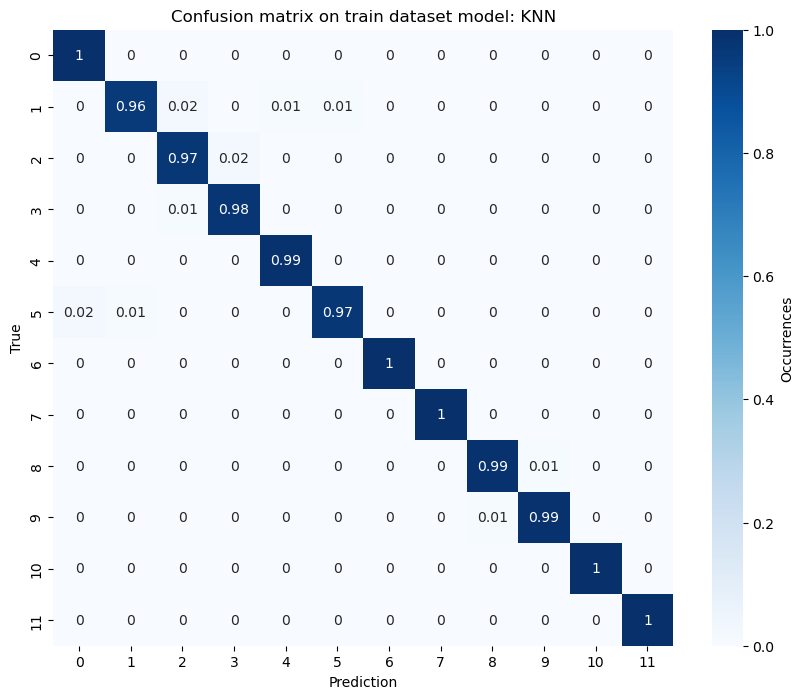

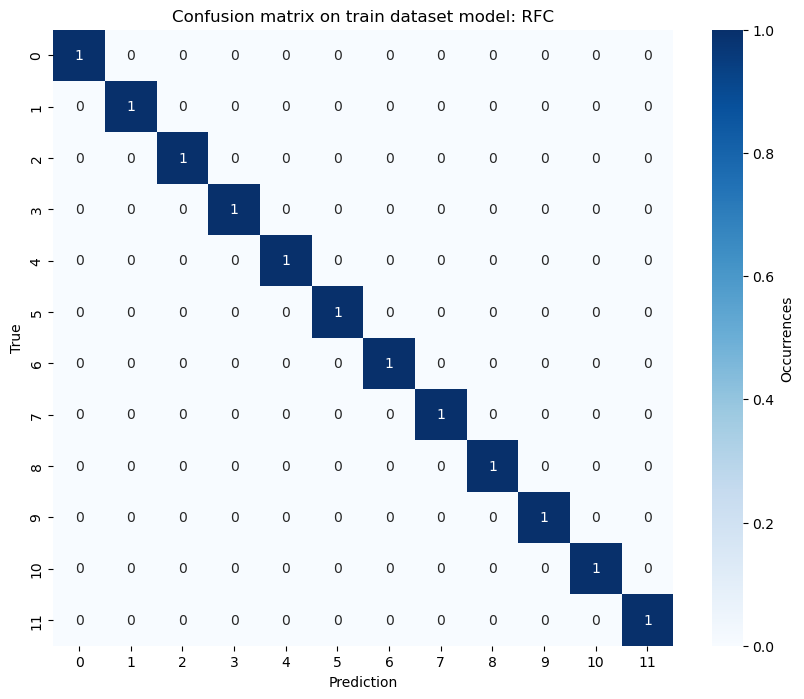

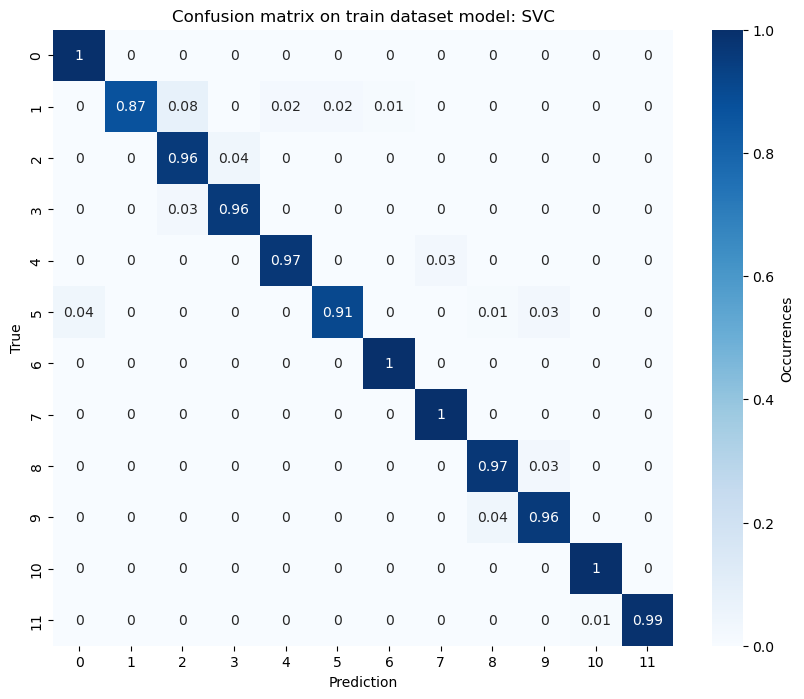

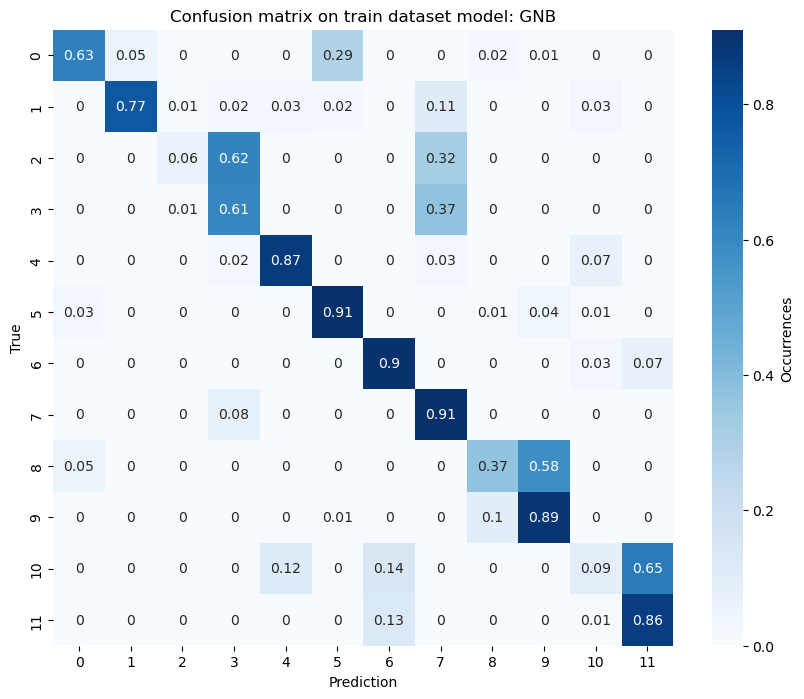

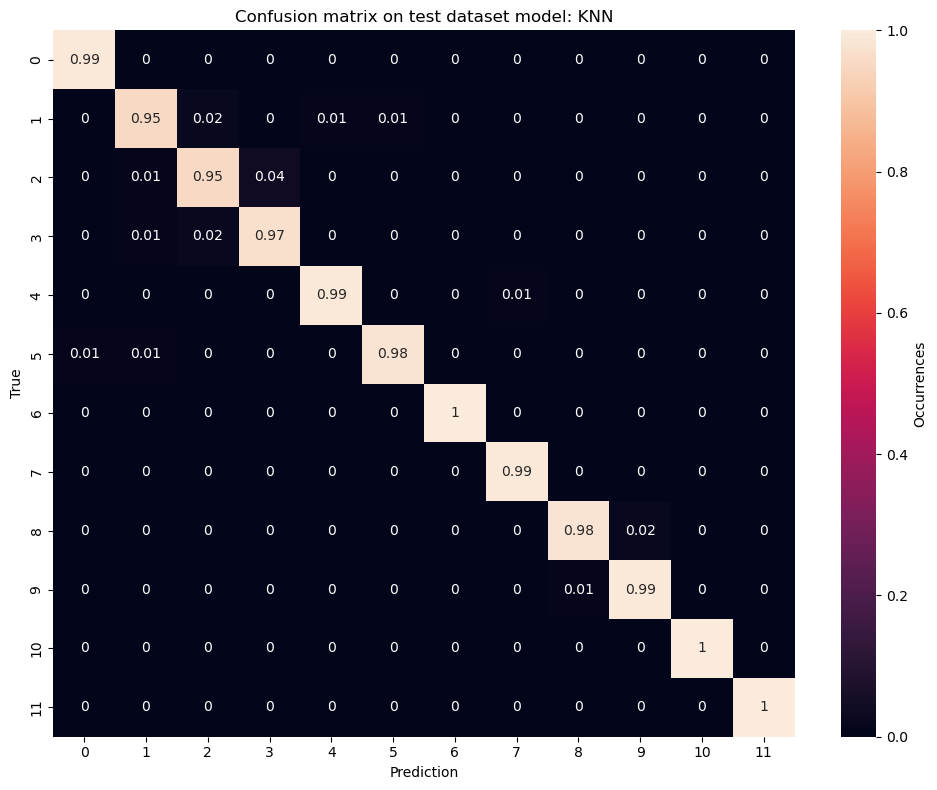

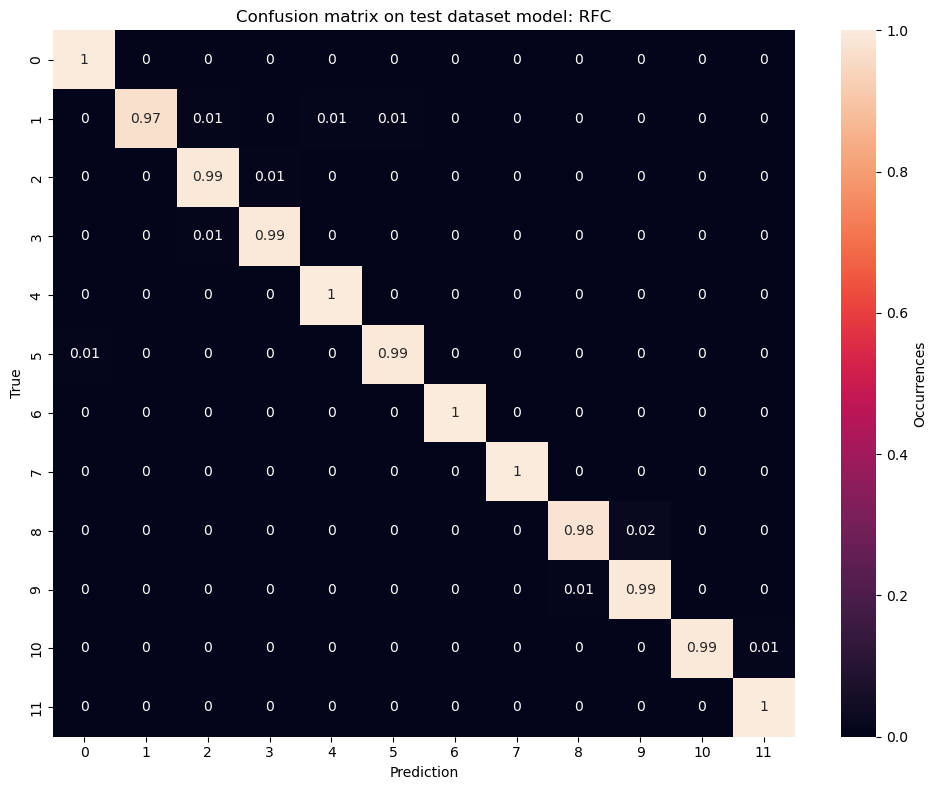

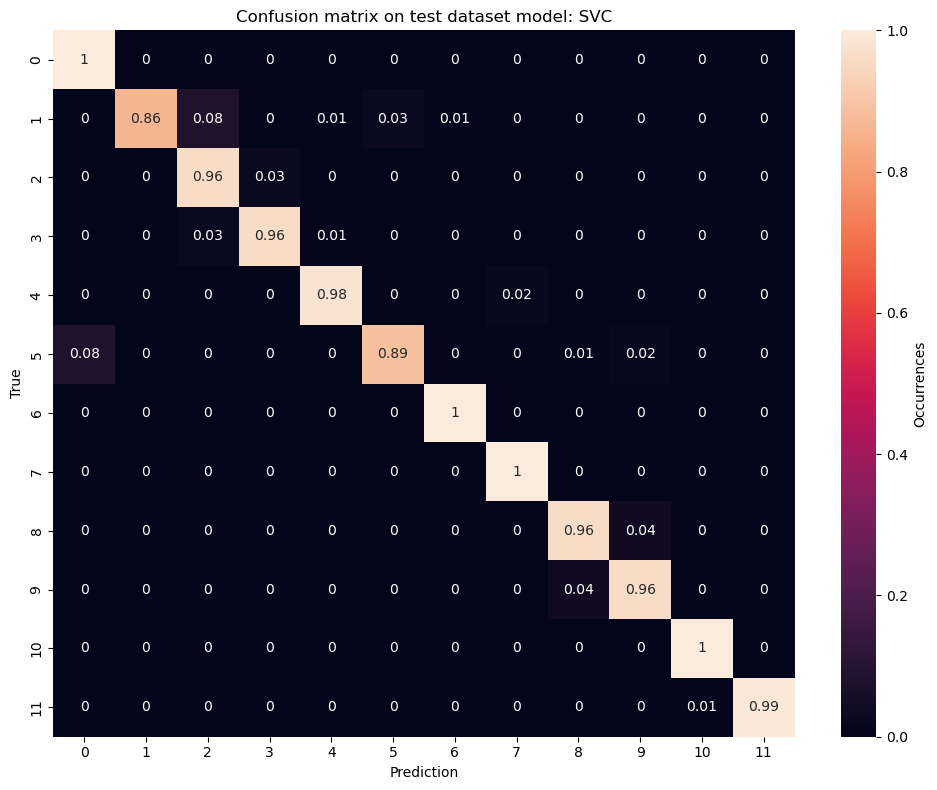

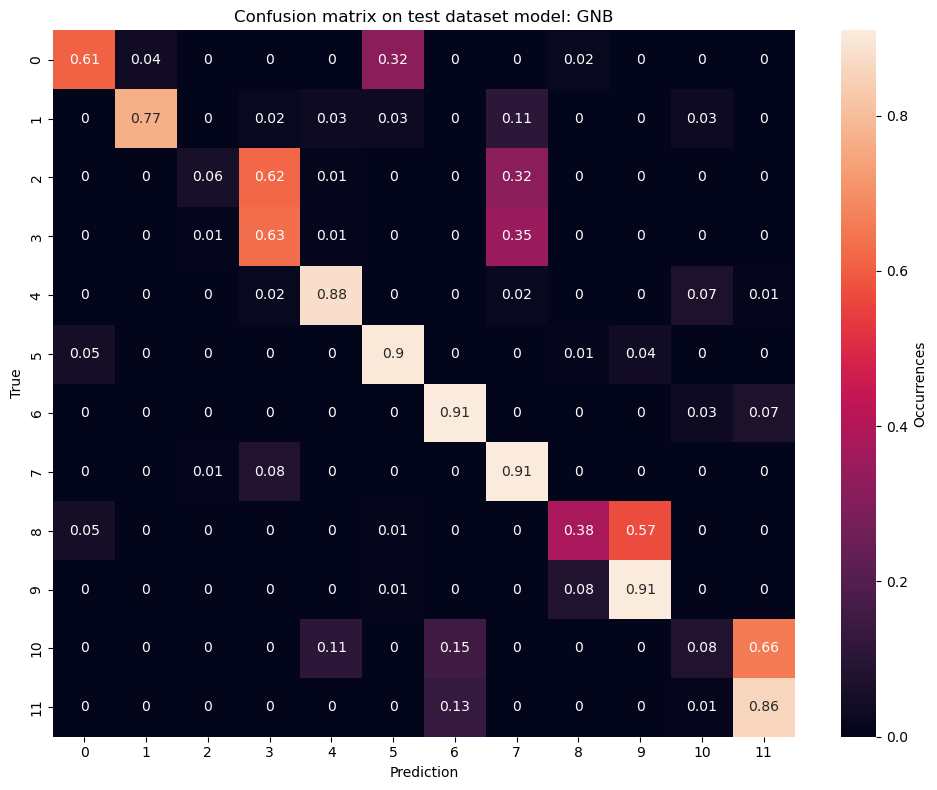

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('model: KNN')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_KNN))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_KNN))

print('model: RFC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_RFC))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_RFC))

print('model: SVC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_SVC))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_SVC))

print('model: Gaussian NB')
print('train se predictions evaluation')
print(classification_report(y_train, y_pred_train_GNB))
print('test set predictions evaluation')
print(classification_report(y_test, y_pred_test_GNB))

train_predicted = [y_pred_train_KNN, y_pred_train_RFC, y_pred_train_SVC, y_pred_train_GNB]
test_predicted = [y_pred_test_KNN, y_pred_test_RFC, y_pred_test_SVC, y_pred_test_GNB]
models = ["KNN", "RFC", "SVC", "GNB"]

for i, label in enumerate(train_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_train, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)

    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on train dataset model: {models[i]}')
    plt.show()

for i, label in enumerate(test_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_test, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)
    
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test,  annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on test dataset model: {models[i]}')
    plt.tight_layout()
    plt.show()

Cross validation 

In [4]:
from sklearn.model_selection import GridSearchCV
import numpy as np

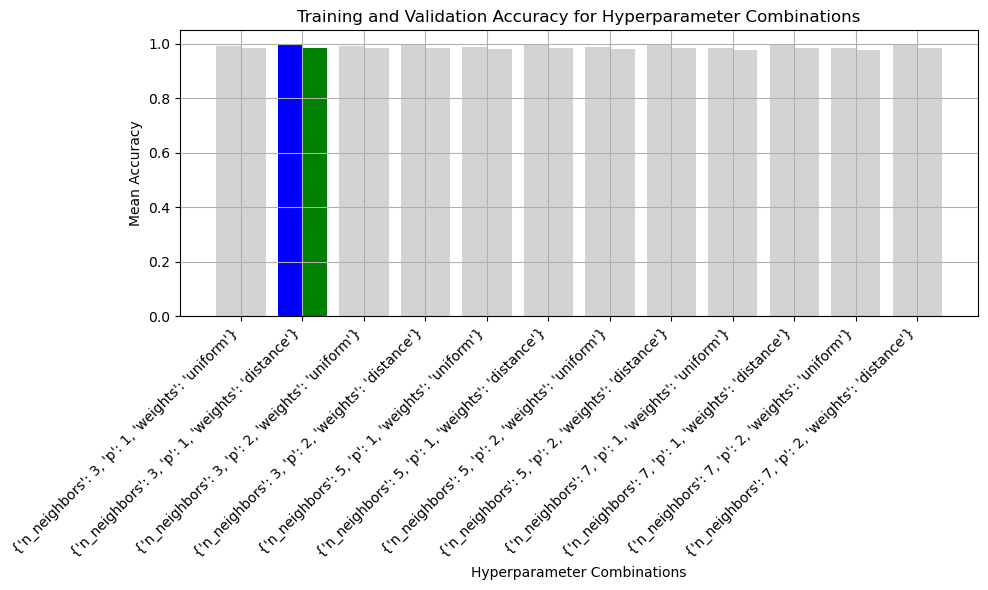

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [7]:

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

gsCV = GridSearchCV(estimator=model_KNN, param_grid=knn_param_grid, scoring='accuracy', cv=5, return_train_score=True)
gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']

# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperparameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)

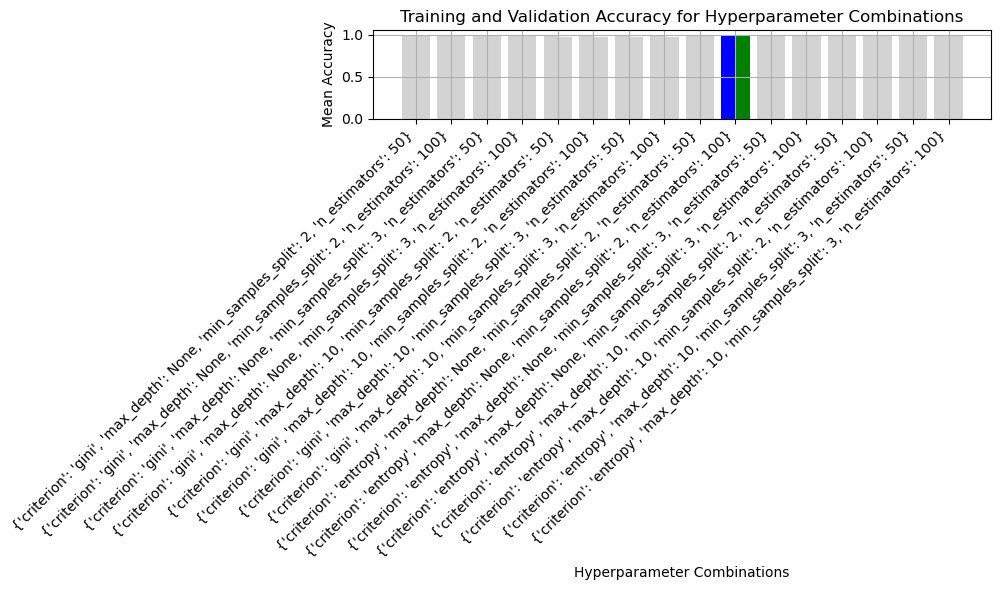

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
[0.99998332 1.         0.99993328 0.99998332 0.98381035 0.98439967
 0.98368248 0.98417173 0.99999444 1.         0.99994996 0.99998888
 0.98878066 0.98888073 0.98860275 0.98937554]
[0.98883625 0.98908087 0.98839149 0.98868057 0.97400318 0.97422556
 0.97411436 0.9744479  0.98912535 0.98916984 0.98883625 0.98899191
 0.97871772 0.97896237 0.97836189 0.9794961 ]


In [11]:
rf_param_grid = {
    'criterion':['gini', 'entropy'],
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 3],
}

#gsCV = GridSearchCV(estimator=model_RFC, param_grid=rf_param_grid, scoring='accuracy', cv=5, return_train_score=True)
#gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']

# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperparameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)
print(mean_train_scores)
print(mean_validation_scores)


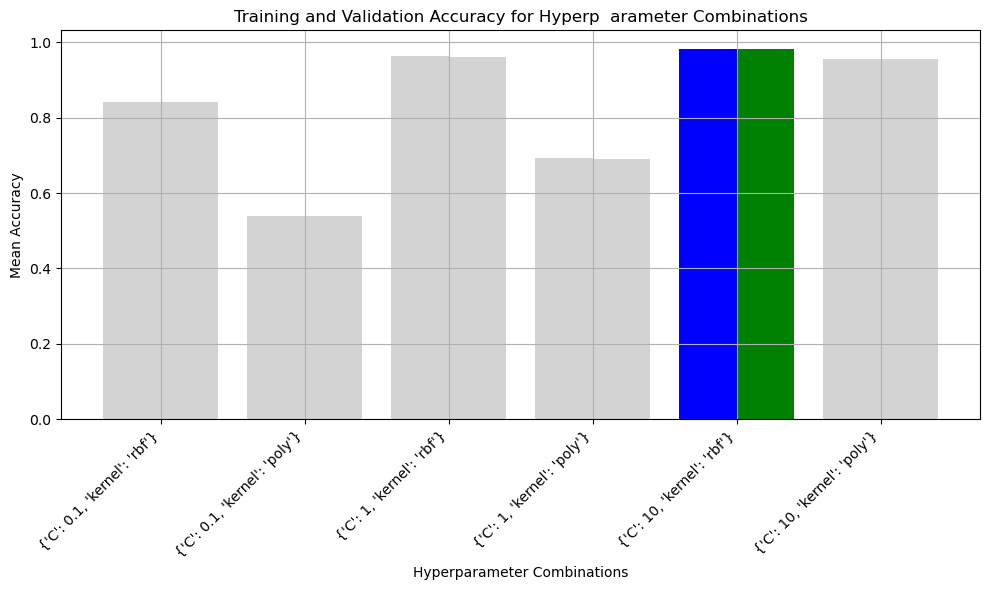

{'C': 10, 'kernel': 'rbf'}


In [13]:
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly']
    
}

#gsCV = GridSearchCV(estimator=model_SVC, param_grid=svc_param_grid, scoring='accuracy', cv=5, return_train_score=True)
#gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']
print(mean_train_scores)
print(mean_validation_scores)
# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperp  arameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)

[0.63613846 0.63613846 0.63614402 0.63616626 0.63619962]
[0.63606741 0.63606741 0.63606741 0.63606741 0.63615636]


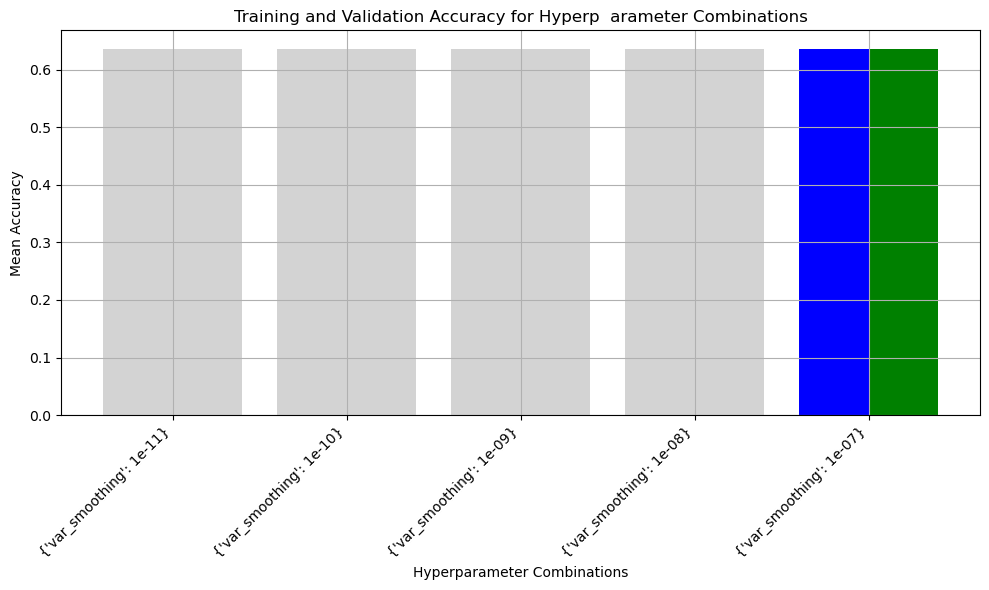

{'var_smoothing': 1e-07}
[0.63613846 0.63613846 0.63614402 0.63616626 0.63619962]
[0.63606741 0.63606741 0.63606741 0.63606741 0.63615636]


In [8]:
gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
    
}

gsCV = GridSearchCV(estimator=model_GNB, param_grid=gnb_param_grid, scoring='accuracy', cv=5, return_train_score=True)
gsCV.fit(X_train, y_train)

results = gsCV.cv_results_
# Extract the mean training and validation scores
mean_train_scores = results['mean_train_score']
mean_validation_scores = results['mean_test_score']
print(mean_train_scores)
print(mean_validation_scores)
# Extract the hyperparameter combinations
param_combinations = [str(params) for params in results['params']]

best_params = gsCV.best_params_
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(param_combinations))

best_params_index= param_combinations.index(str(best_params))
bar_colors_train = ['lightgray' if i != best_params_index else 'blue' for i in range(len(param_combinations))]
bar_colors_validation = ['lightgray' if i != best_params_index else 'green' for i in range(len(param_combinations))]
ax.bar(x - 0.2, mean_train_scores, width=0.4, label='Training Accuracy', align='center', color=bar_colors_train)
ax.bar(x + 0.2, mean_validation_scores, width=0.4, label='Validation Accuracy', align='center', color=bar_colors_validation)

ax.set_xticks(x)
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
ax.set_xlabel('Hyperparameter Combinations')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Training and Validation Accuracy for Hyperp  arameter Combinations')
plt.grid()
plt.tight_layout()
plt.show()

print(best_params)
print(mean_train_scores)
print(mean_validation_scores)

Once we find the best hyperparameters for each model, we can investigate the false positive and false negative

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

final_model_KNN = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
final_model_KNN.fit(X_train, y_train)

final_model_RFC = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_split=2, n_estimators=100)
final_model_RFC.fit(X_train, y_train)

final_model_SVC = SVC(C=10,kernel='rbf')
final_model_SVC.fit(X_train, y_train)

y_pred_train_final_KNN = model_KNN.predict(X_train)
y_pred_test_final_KNN = model_KNN.predict(X_test)

y_pred_train_final_RFC = model_RFC.predict(X_train)
y_pred_test_final_RFC = model_RFC.predict(X_test)

y_pred_train_final_SVC = model_SVC.predict(X_train)
y_pred_test_final_SVC = model_SVC.predict(X_test)

print('model: final KNN')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_final_KNN))
print('model: base KNN')
print(classification_report(y_train, y_pred_train_KNN))
print('test set predictions evaluation')
print('model: final KNN')
print(classification_report(y_test, y_pred_test_final_KNN))
print(classification_report(y_test, y_pred_test_KNN))

print('model: final RFC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_final_RFC))
print('model: base RFV')
print(classification_report(y_train, y_pred_train_RFC))
print('test set predictions evaluation')
print('model: final RFC')
print(classification_report(y_test, y_pred_test_final_RFC))
print('model: base RFC')
print(classification_report(y_test, y_pred_test_RFC))

print('model: final SVC')
print('train set predictions evaluation')
print(classification_report(y_train, y_pred_train_final_SVC))
print('model: base SVC')
print(classification_report(y_train, y_pred_train_SVC))
print('test set predictions evaluation')
print('model: final SVC')
print(classification_report(y_test, y_pred_test_final_SVC))
print('model: base SVC')
print(classification_report(y_test, y_pred_test_SVC))

train_predicted = [y_pred_train_final_KNN, y_pred_train_KNN, y_pred_train_final_RFC, y_pred_train_RFC, y_pred_train_final_SVC, y_pred_train_RFC]
test_predicted = [y_pred_test_final_KNN, y_pred_test_KNN, y_pred_test_final_RFC, y_pred_test_RFC, y_pred_test_final_SVC, y_pred_test_SVC]
models = ["Final KNN", "Base KNN", "Final RFC", "Base RFC", "Final SVC", "Base SVC"]

for i, label in enumerate(train_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_train, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on train dataset model: {models[i]}')
    plt.show()

for i, label in enumerate(test_predicted):    
    # get the confusion matrix of test set
    conf_matrix = confusion_matrix(y_test, label)
    confusion_test = (conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)).round(2)
    
    # visualize the confusion matrix
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_test,  annot=True, cbar_kws={'label':'Occurrences'})
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion matrix on test dataset model: {models[i]}')
    plt.tight_layout()
    plt.show()